**Q** **Learning** **Example**

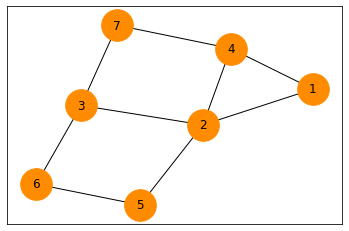

In [ ]:
import numpy as np
import pylab as plt
import networkx as nx

# adding the possible points/actions
points_list = [(1,2), (1,4), (2,3), (2,4), (2,5), (3,7), (3,6), (4,7), (5,6)]

# defining the goal
goal = 7

# plotting the corresponding graph denoting the links between nodes
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, node_color='darkorange', node_size=1000,)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

**R** **Table**

In [ ]:
# defining the size of the matrix for reward table 
MATRIX_SIZE = 7

# creating the matrix for reward table 
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))

#initializing with -1 values
R *= -1 

In [ ]:
# assiging reward values to the R matrix 

for point in points_list:
    if point[1] == goal: 
        R[(point[0]-1), (point[1]-1)] = 100
    else:
        R[(point[0]-1), (point[1]-1)] = 0 

    if point[0] == goal:
        R[((point[0]-1), (point[1]-1))[::-1]] = 100
    else:
        R[((point[0]-1), (point[1]-1))[::-1]]= 0 

R[goal-1,goal-1]= 100 
print("Reward Table:")
R

Reward Table:


matrix([[ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,   0.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,  -1.,   0., 100.],
        [  0.,   0.,  -1.,  -1.,  -1.,  -1., 100.],
        [ -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.],
        [ -1.,  -1.,   0.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,   0.,  -1.,  -1., 100.]])

**Q** **Table**

In [ ]:
#initializing the Q table with zeros
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE])) 

# setting the learning rate
gamma = 0.7 

initial_state = 1 

In [ ]:
# function to select the set of avaialble actions for a state
def available_actions(state):  
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

In [ ]:
# funtion to a select particular action randomly out of available actions
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1)) 
    return next_action

action = sample_next_action(available_act)

In [ ]:
# function to update the Q table with the reward value
def update(current_state, action, gamma): 

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]  

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]       

  Q[current_state, action] = R[current_state, action] + gamma * max_value

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state, action, gamma)

0

**Training**

In [ ]:
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state) 
    action = sample_next_action(available_act) 
    score = update(current_state,action,gamma) 
    scores.append(score)

normalized_Q = Q/np.max(Q)*100

print("Final Q matrix:")
print(Q/np.max(Q)*100) 

Final Q matrix:
[[  0.          49.           0.          70.           0.
    0.           0.        ]
 [ 49.           0.          70.          70.          34.3
    0.           0.        ]
 [  0.          49.           0.           0.           0.
   49.         100.        ]
 [ 48.9999911   49.           0.           0.           0.
    0.         100.        ]
 [  0.          49.           0.           0.           0.
   49.           0.        ]
 [  0.           0.          70.           0.          34.3
    0.           0.        ]
 [  0.           0.          70.          69.99998728   0.
    0.          99.99999843]]


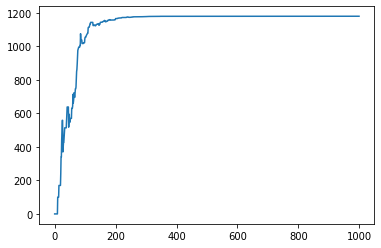

In [ ]:
plt.plot(scores)
plt.show()

**Testing**

In [ ]:
current_state = 1
steps = [current_state]

while current_state != goal:

    next_step_index = np.where(normalized_Q[(current_state-1),] == 
                               np.max(normalized_Q[(current_state-1),]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index+1)
    current_state = next_step_index+1

print("Most efficient path:")
print(steps)

Most efficient path:
[1, 4, 7]


In [ ]:
current_state = 5
steps = [current_state]

while current_state != goal:

    next_step_index = np.where(normalized_Q[(current_state-1),] == 
                               np.max(normalized_Q[(current_state-1),]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index+1)
    current_state = next_step_index+1

print("Most efficient path:")
print(steps)

Most efficient path:
[5, 2, 3, 7]
